In [ ]:
# ============================================
# 1) GEREKLİ KÜTÜPHANELER
# ============================================
import numpy as np
import matplotlib.pyplot as plt

from google.colab import files

import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model

from PIL import Image
import io

print("TensorFlow versiyonu:", tf.__version__)


TensorFlow versiyonu: 2.19.0


In [ ]:
# ============================================
# 2) VGG16 MODELİNİ YÜKLE ve ARA KATMANLARI SEÇ
# ============================================
# ImageNet ile eğitilmiş, fully-connected (üst) katmanlar hariç
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# İnceleyeceğimiz katmanlar
layer_names = ["block1_conv1", "block3_conv3", "block5_conv3"]
outputs = [base_model.get_layer(name).output for name in layer_names]

# Girdi: orijinal resim, Çıktı: seçili ara katman feature map'leri
feature_model = Model(inputs=base_model.input, outputs=outputs)

print("\nSeçilen katmanlar:")
for n in layer_names:
    print("-", n)



Seçilen katmanlar:
- block1_conv1
- block3_conv3
- block5_conv3


In [ ]:
# ============================================
# 3) YARDIMCI FONKSİYONLAR
# ============================================

def load_and_preprocess_image_from_bytes(file_bytes):
    """
    Colab files.upload ile gelen ham bytes'ı alır,
    PIL ile okur, (224, 224)'e resize eder,
    VGG16 için hazırlar.

    Dönüş:
      - img_np_disp: (224, 224, 3), [0,1] aralığında görselleştirme için
      - x: (1, 224, 224, 3), VGG16 preprocess edilmiş tensor
    """
    # Bytes → PIL Image
    img = Image.open(io.BytesIO(file_bytes)).convert("RGB")
    img = img.resize((224, 224))

    # PIL → numpy (0-255)
    img_np = np.array(img).astype("float32")

    # Model girişi
    x = np.expand_dims(img_np, axis=0)   # (1, 224, 224, 3)
    x = preprocess_input(x)              # VGG16 için standart preprocess

    # Görselleştirme için 0-1 aralığına alınmış versiyon
    img_np_disp = img_np / 255.0

    return img_np_disp, x


def plot_feature_maps(feature_maps, title_prefix="", max_channels=32):
    """
    feature_maps: (1, H, W, C)
    İlk max_channels tanesini grid şeklinde çizer.
    """
    feature_maps = feature_maps[0]   # batch dimension -> 0
    n_channels = feature_maps.shape[-1]
    n_show = min(max_channels, n_channels)

    grid_size = int(np.ceil(np.sqrt(n_show)))

    plt.figure(figsize=(grid_size * 2, grid_size * 2))
    for i in range(n_show):
        ax = plt.subplot(grid_size, grid_size, i + 1)
        fm = feature_maps[:, :, i]

        # Normalizasyon (0-1)
        fm_min, fm_max = fm.min(), fm.max()
        if fm_max > fm_min:
            fm = (fm - fm_min) / (fm_max - fm_min)
        else:
            fm = np.zeros_like(fm)

        plt.imshow(fm, cmap="viridis")
        plt.axis("off")

    plt.suptitle(title_prefix, fontsize=14)
    plt.tight_layout()
    plt.show()


In [ ]:
# ============================================
# 4) GÖRSELLERİ YÜKLE (6 TANE veya DAHA FAZLA)
# ============================================
uploaded = files.upload()

print("\nYüklenen dosyalar:")
for name in uploaded.keys():
    print("-", name)


Saving ppbJUaa-xSY0sE2lEIY5__6fe8d2510ab340999f6f14f3e9fa55c3.png to ppbJUaa-xSY0sE2lEIY5__6fe8d2510ab340999f6f14f3e9fa55c3 (1).png
Saving AcF9c7EfMvp5D7G3Uq2jK_5062a3696bfb41eb8b2b3477b62d21a0.png to AcF9c7EfMvp5D7G3Uq2jK_5062a3696bfb41eb8b2b3477b62d21a0 (1).png
Saving 0NsU4NATi43tfDONc5P4O.png to 0NsU4NATi43tfDONc5P4O (1).png
Saving SBhvyNUq0Neyf76y8_ntI.png to SBhvyNUq0Neyf76y8_ntI (1).png
Saving x50IqrIIOE9lJ2HT9SloU.jpg to x50IqrIIOE9lJ2HT9SloU (1).jpg
Saving mekDInS6g5bDVcCL1mVbG.png to mekDInS6g5bDVcCL1mVbG (1).png

Yüklenen dosyalar:
- ppbJUaa-xSY0sE2lEIY5__6fe8d2510ab340999f6f14f3e9fa55c3 (1).png
- AcF9c7EfMvp5D7G3Uq2jK_5062a3696bfb41eb8b2b3477b62d21a0 (1).png
- 0NsU4NATi43tfDONc5P4O (1).png
- SBhvyNUq0Neyf76y8_ntI (1).png
- x50IqrIIOE9lJ2HT9SloU (1).jpg
- mekDInS6g5bDVcCL1mVbG (1).png



Görsel: ppbJUaa-xSY0sE2lEIY5__6fe8d2510ab340999f6f14f3e9fa55c3 (1).png


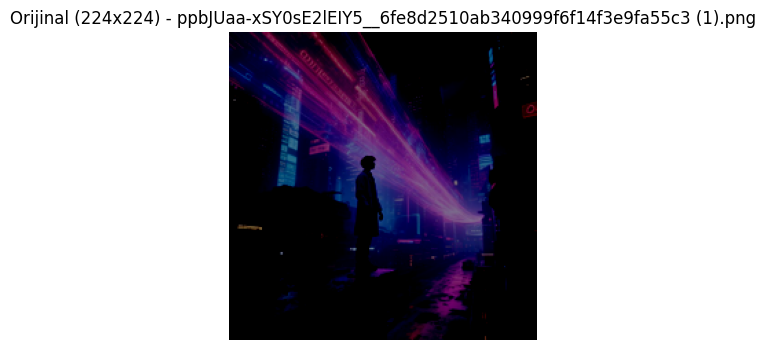

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


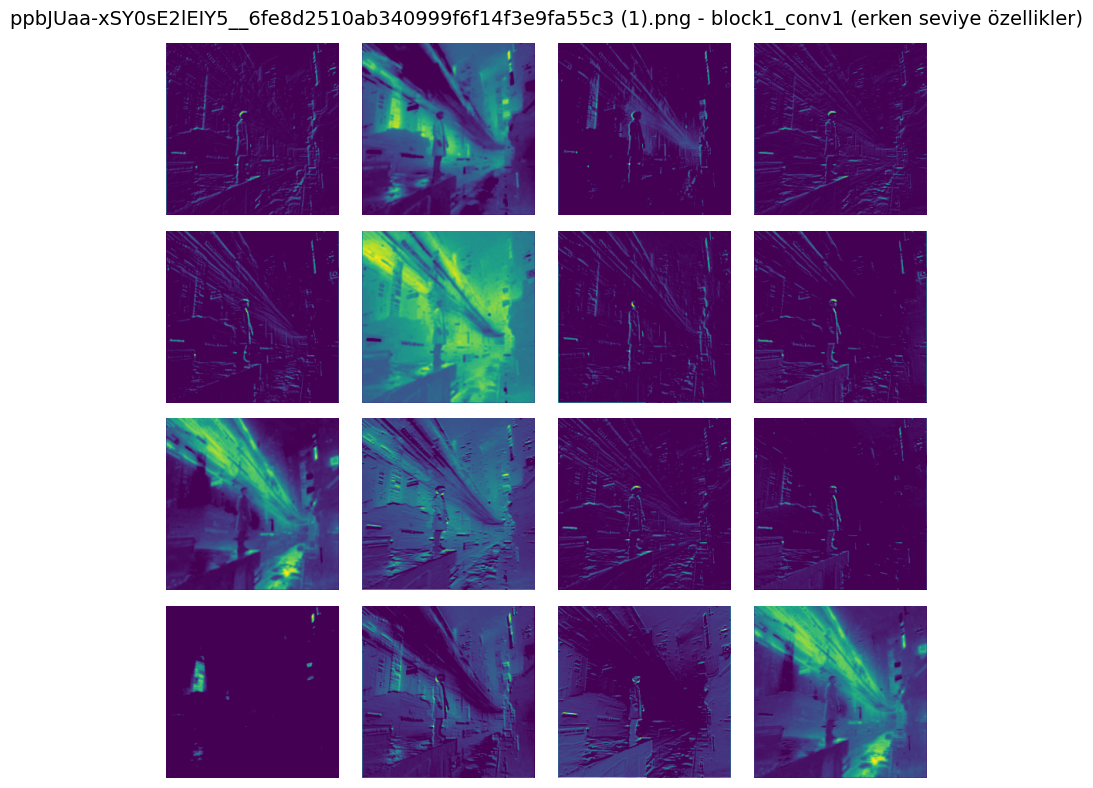

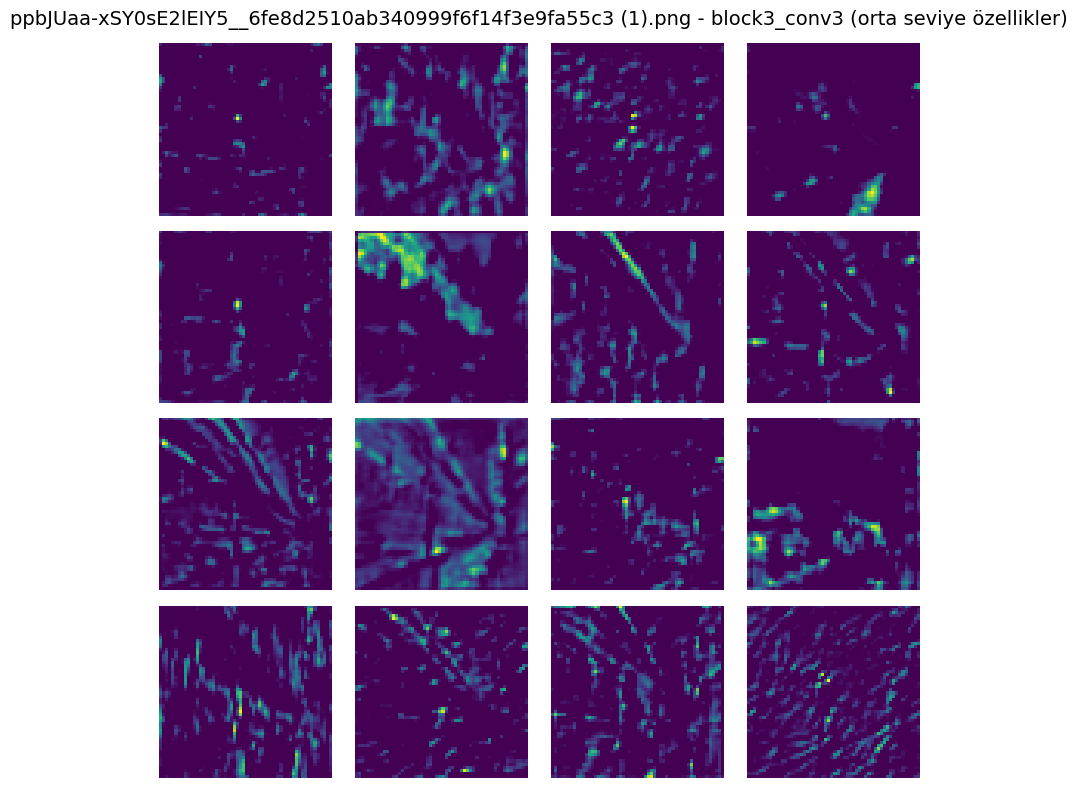

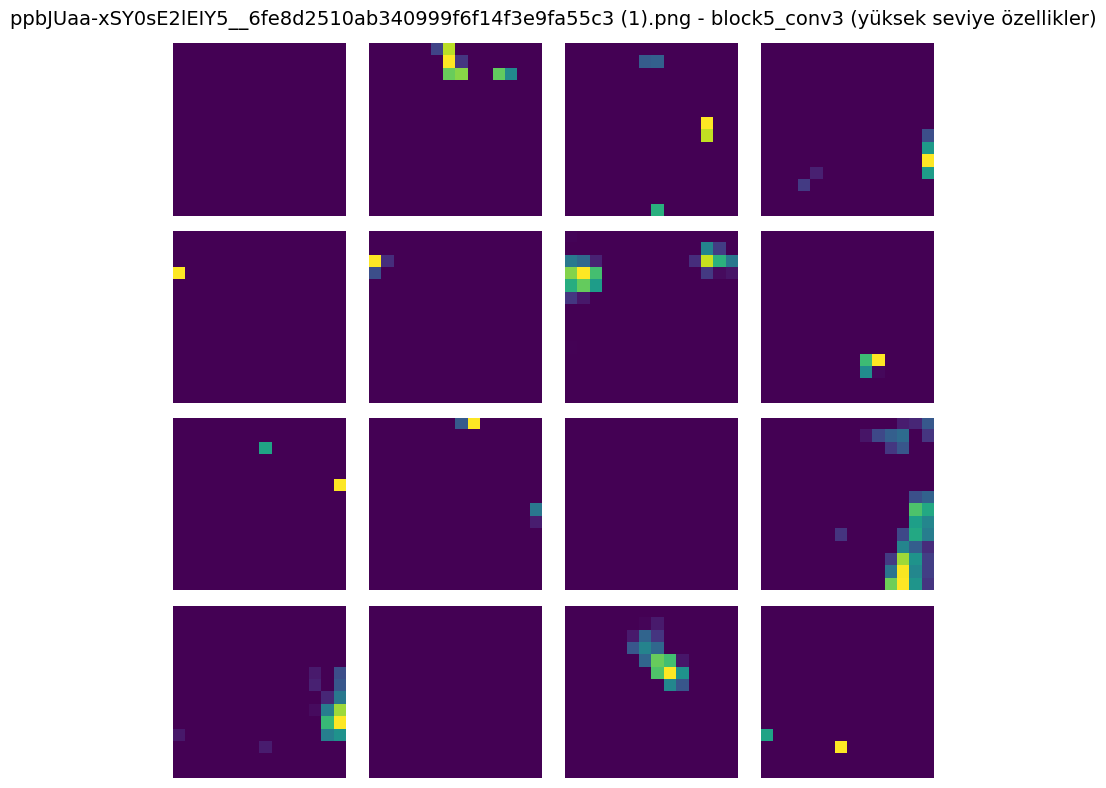


Görsel: AcF9c7EfMvp5D7G3Uq2jK_5062a3696bfb41eb8b2b3477b62d21a0 (1).png


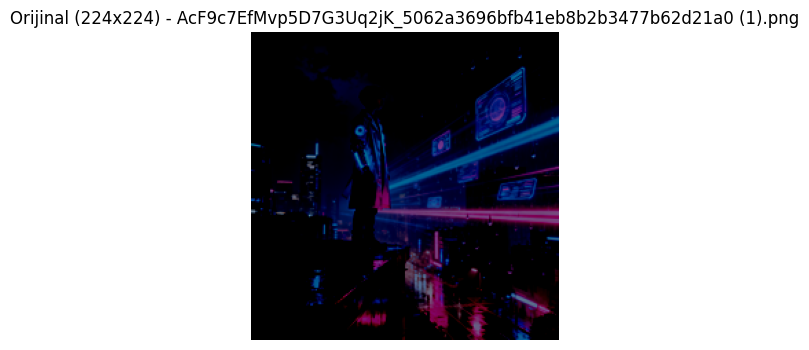

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


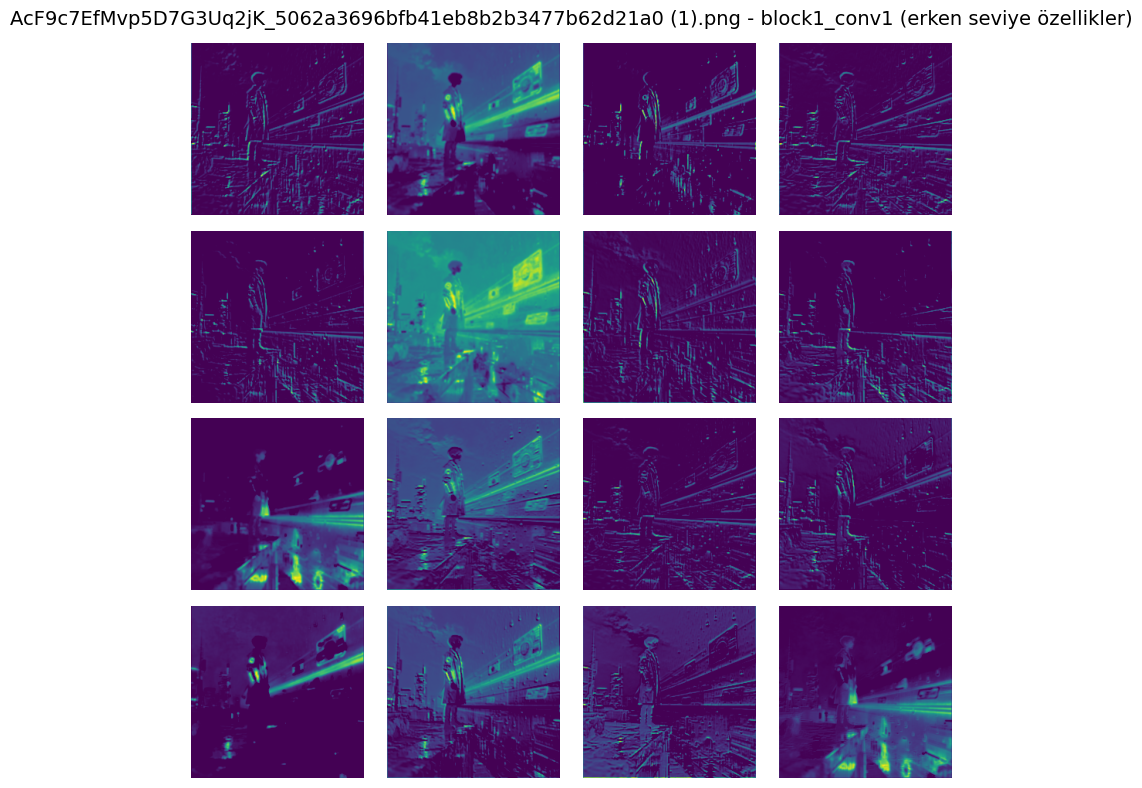

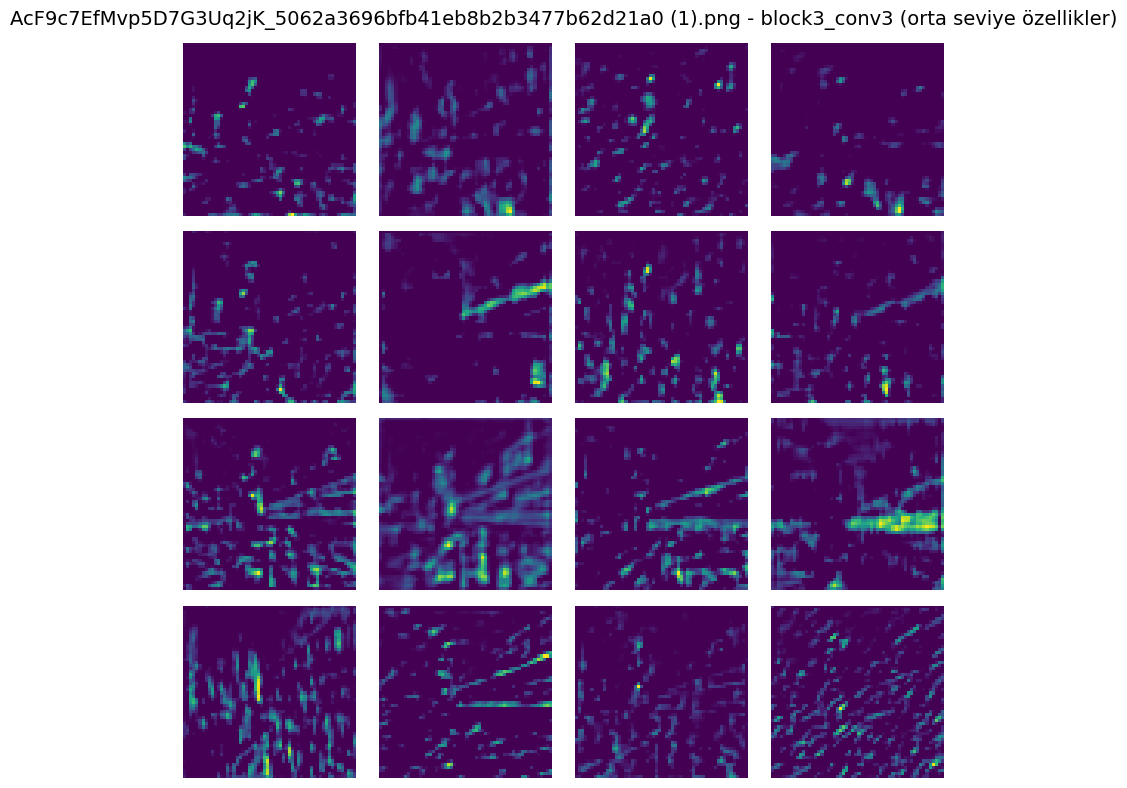

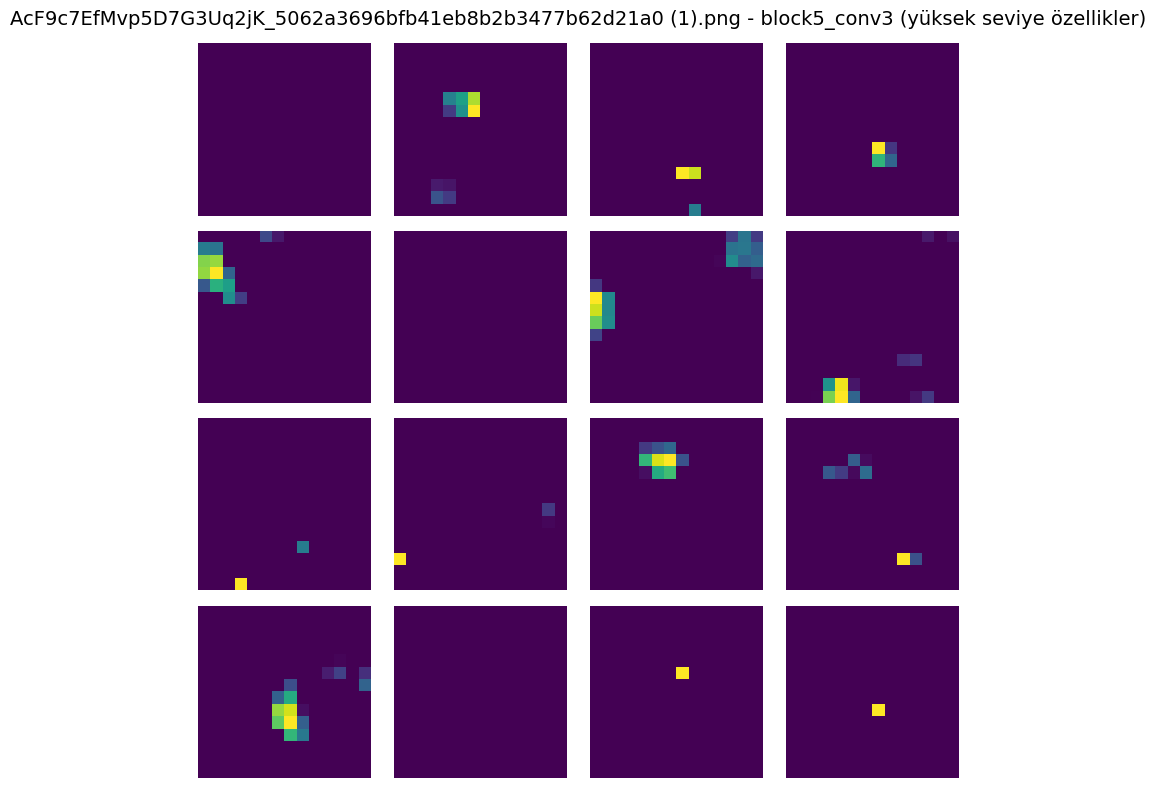


Görsel: 0NsU4NATi43tfDONc5P4O (1).png


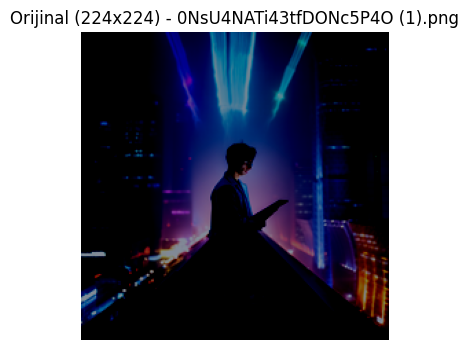

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


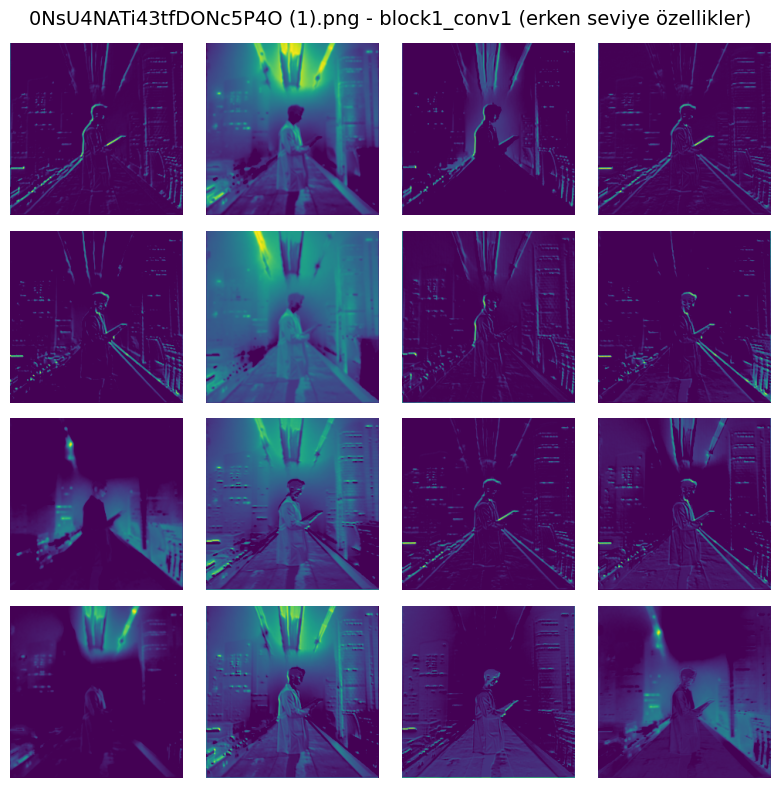

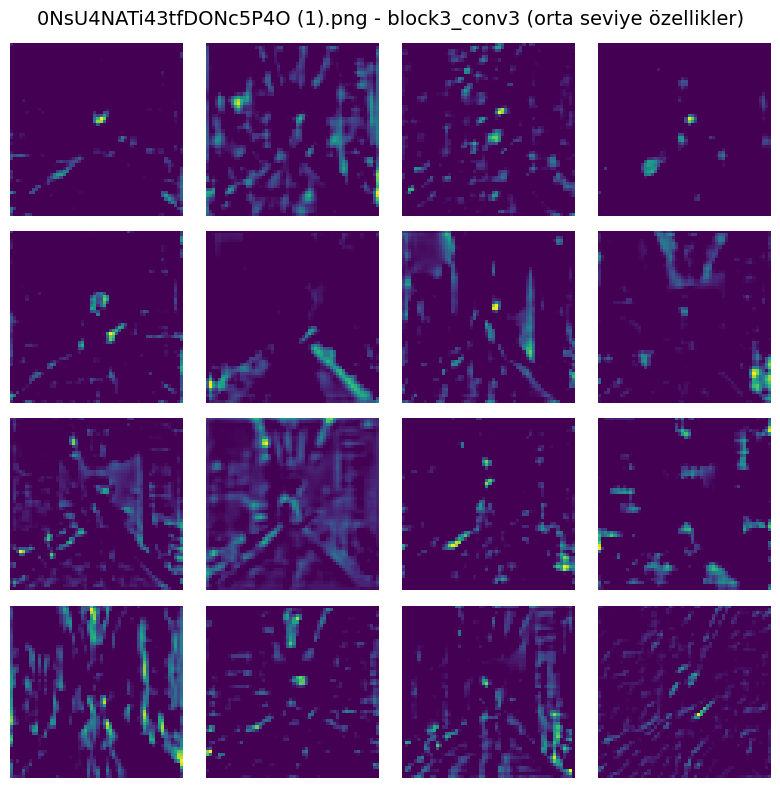

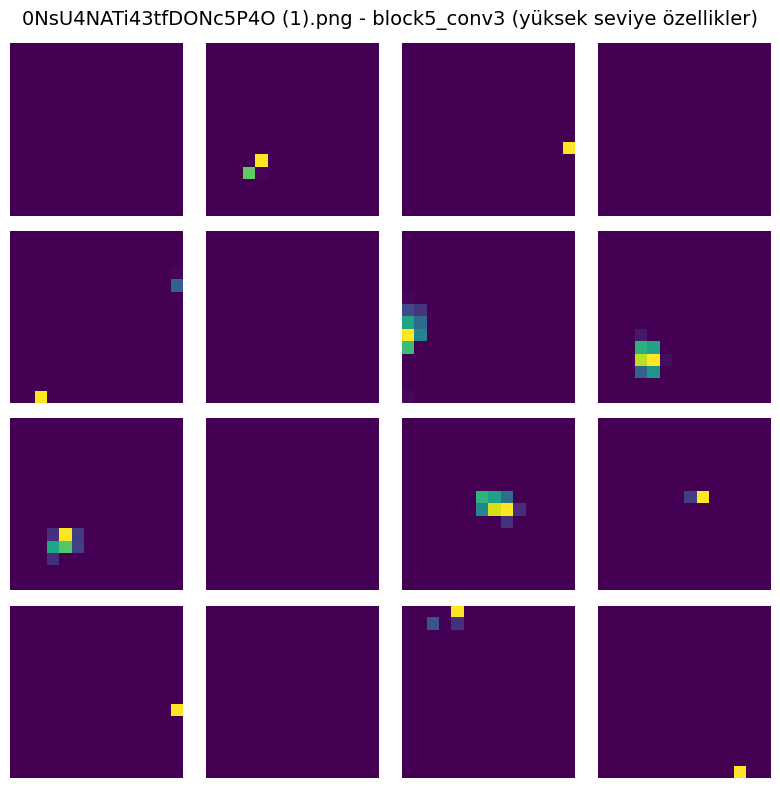


Görsel: SBhvyNUq0Neyf76y8_ntI (1).png


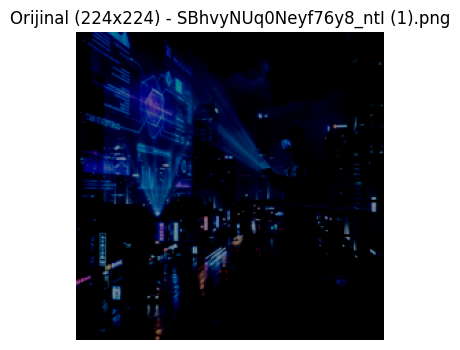

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


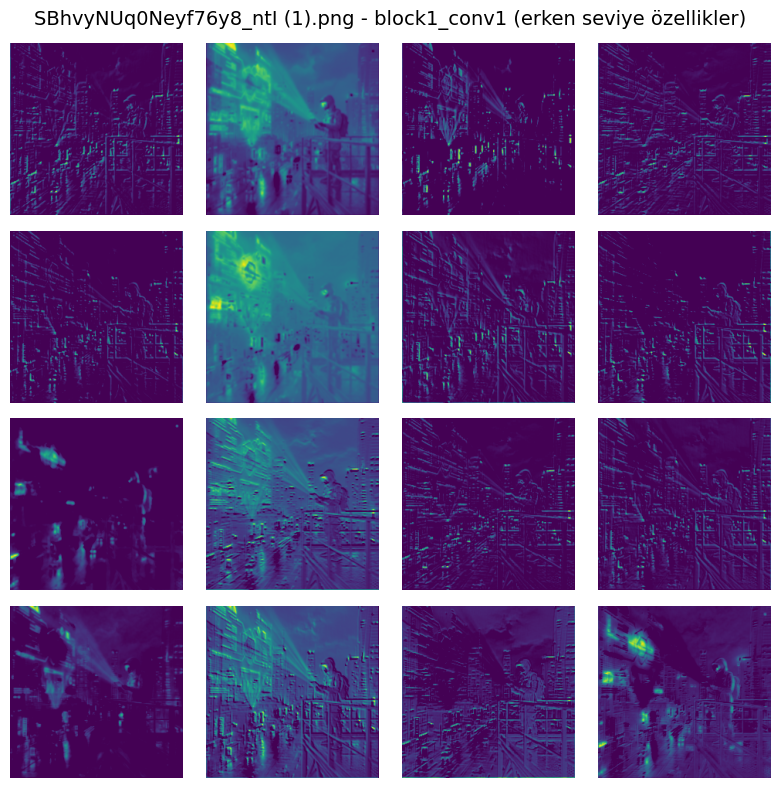

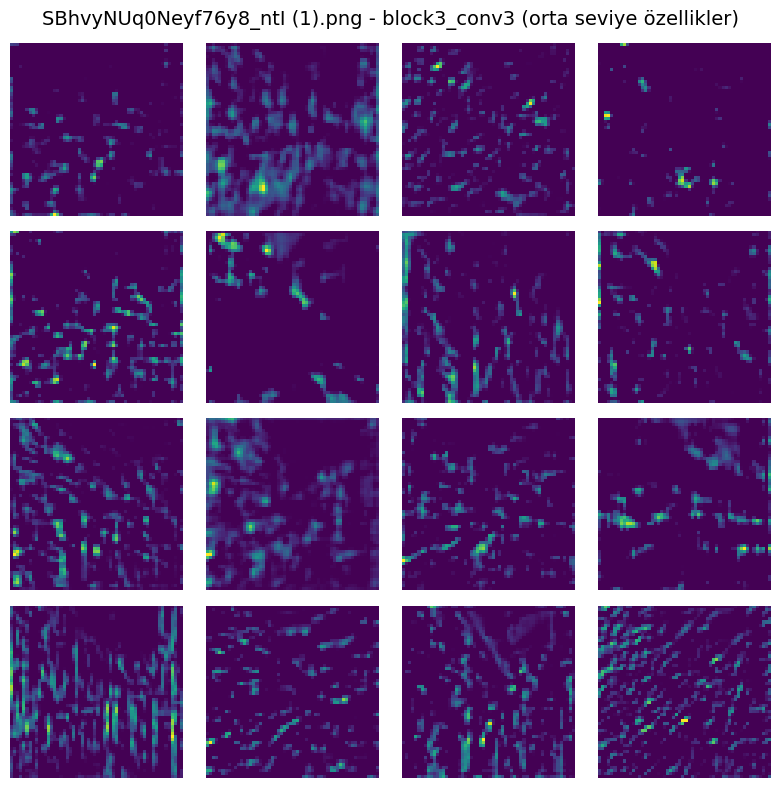

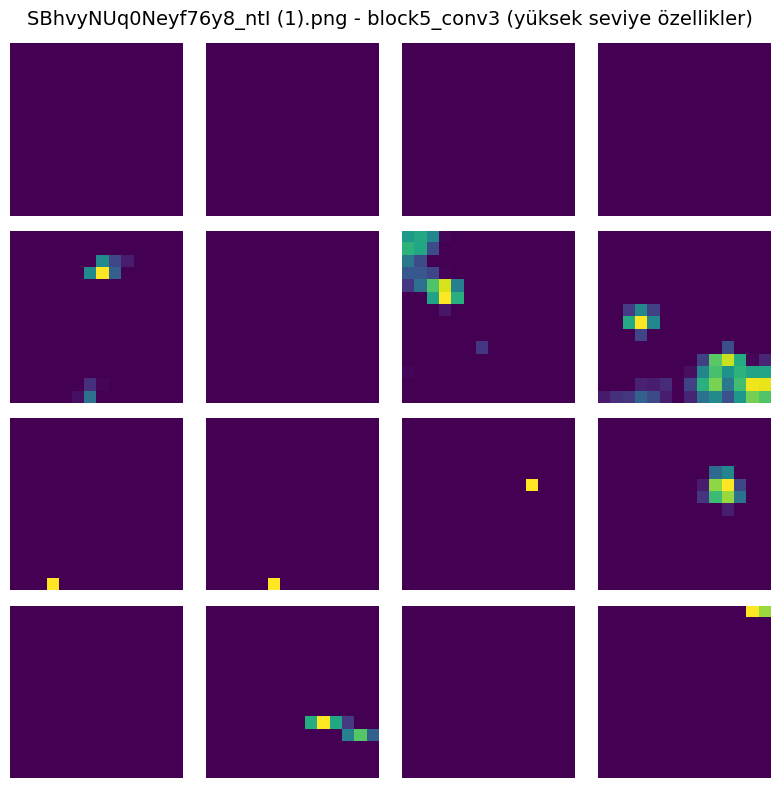


Görsel: x50IqrIIOE9lJ2HT9SloU (1).jpg


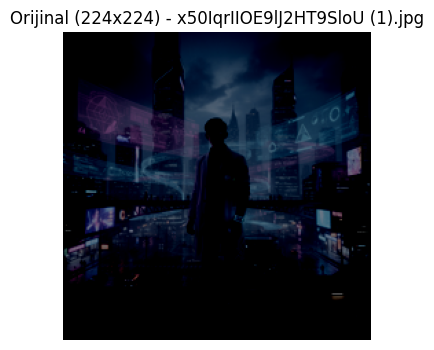

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


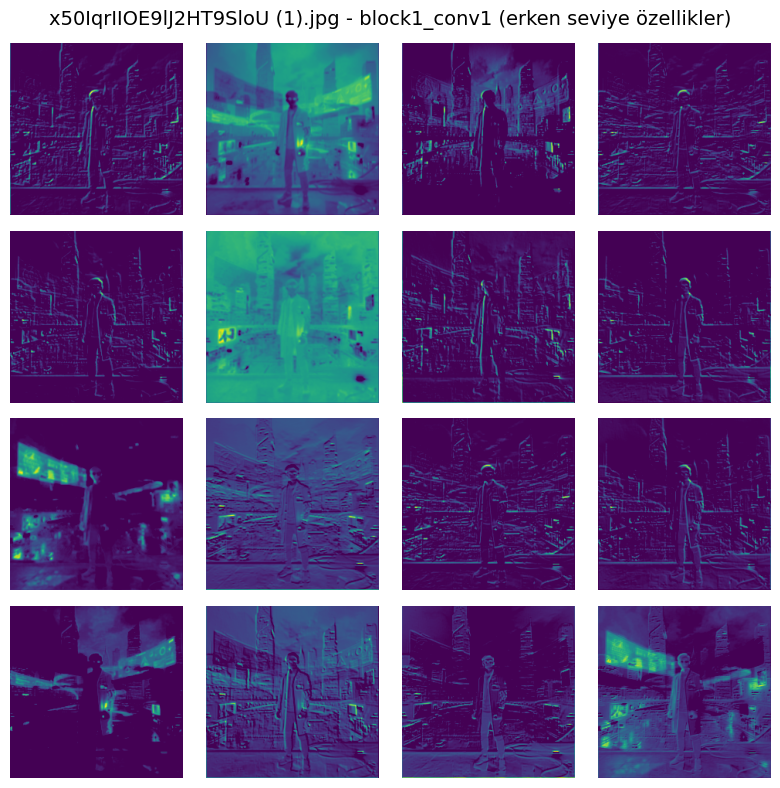

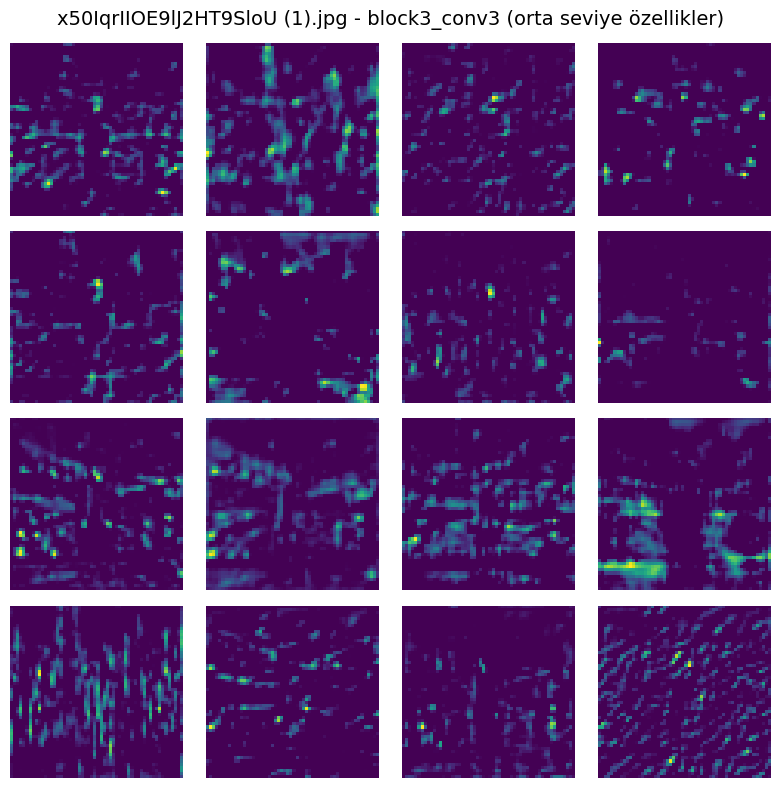

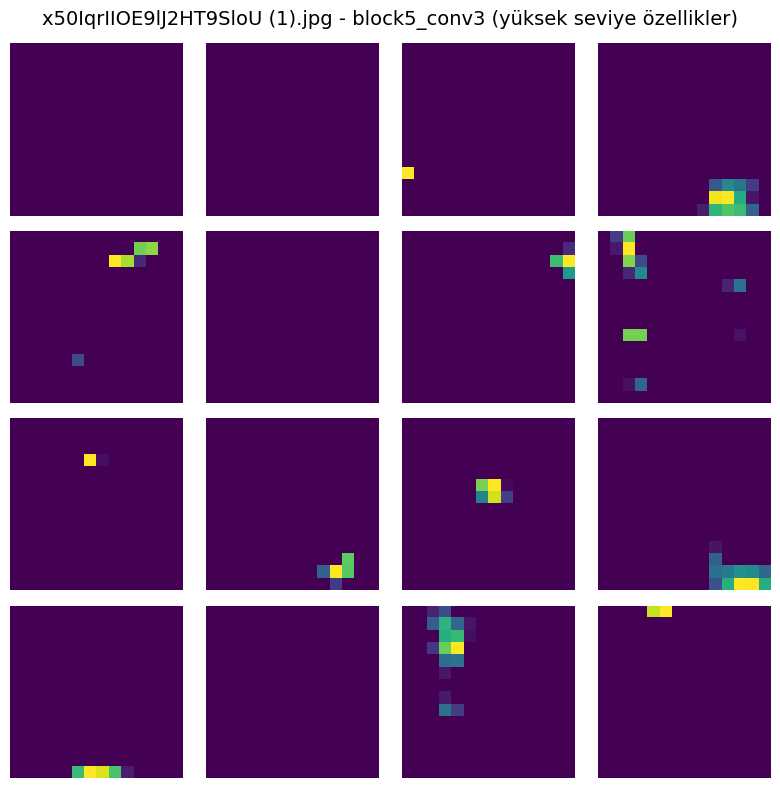


Görsel: mekDInS6g5bDVcCL1mVbG (1).png


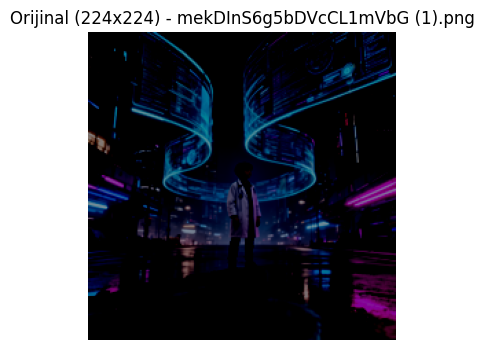

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


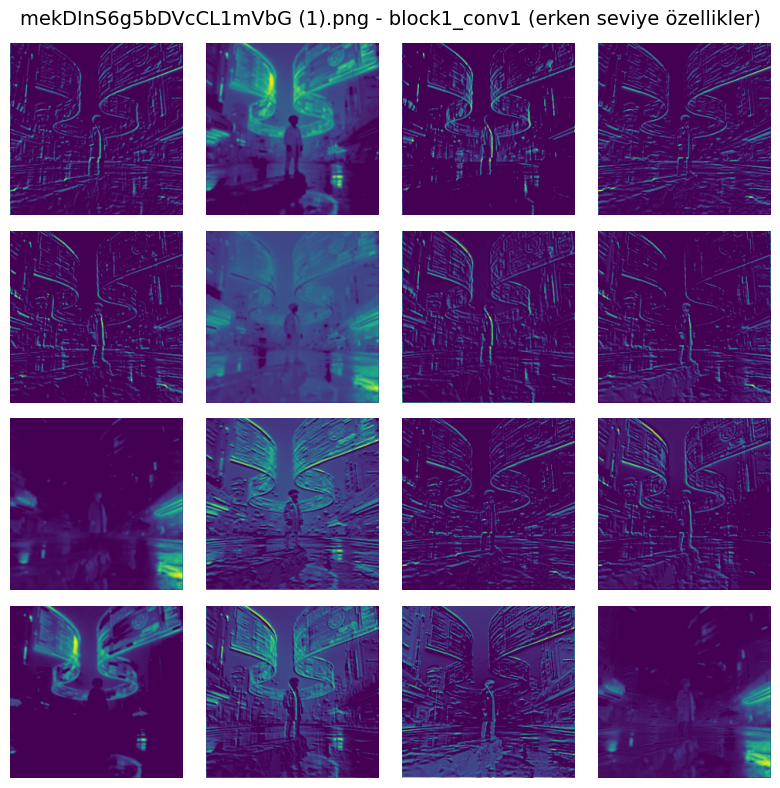

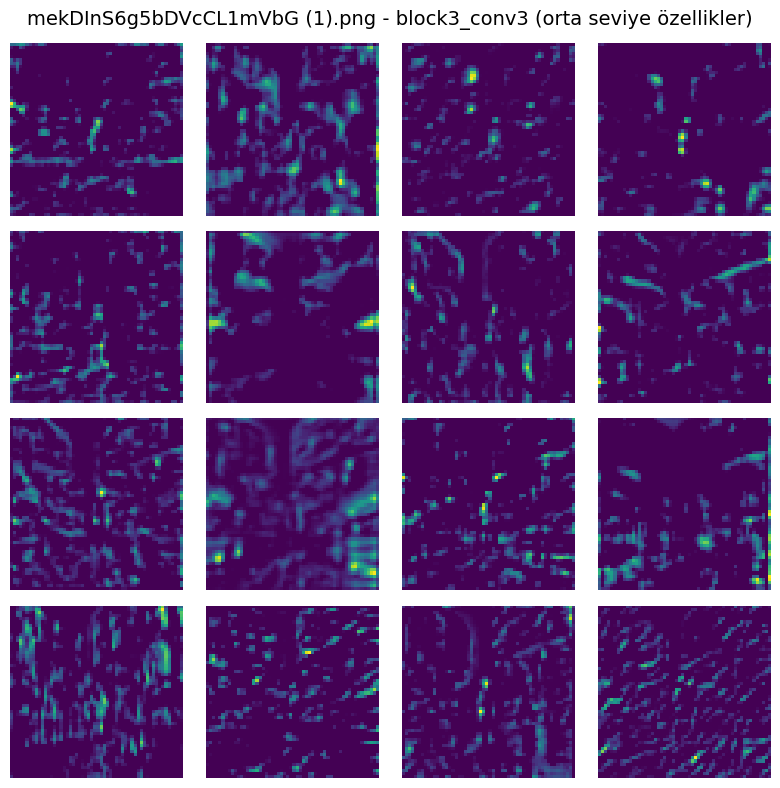

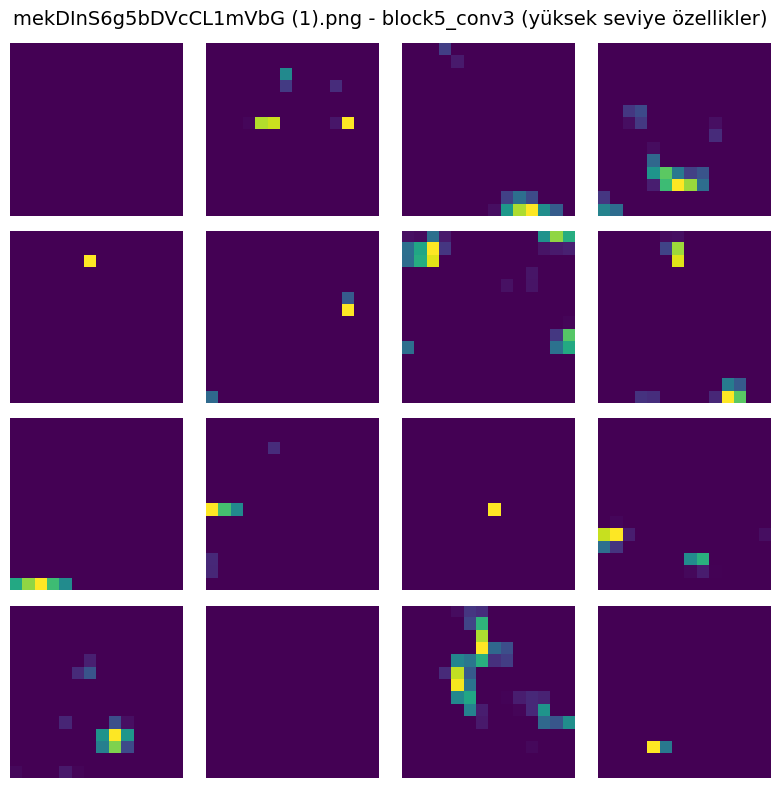

In [ ]:
# ============================================
# 5) HER GÖRSEL İÇİN FEATURE MAP ANALİZİ
# ============================================

for image_name, file_content in uploaded.items():
    print("\n" + "="*70)
    print("Görsel:", image_name)
    print("="*70)

    # Orijinal & model girdisi hazırla
    img_np, x = load_and_preprocess_image_from_bytes(file_content)

    # Orijinal (224x224) görseli göster
    plt.figure(figsize=(4, 4))
    plt.imshow(img_np)
    plt.axis("off")
    plt.title(f"Orijinal (224x224) - {image_name}")
    plt.show()

    # Feature map'leri hesapla
    fm_block1, fm_block3, fm_block5 = feature_model.predict(x)

    # Erken seviye özellikler (kenar / basit tekstür)
    plot_feature_maps(
        fm_block1,
        title_prefix=f"{image_name} - block1_conv1 (erken seviye özellikler)",
        max_channels=16
    )

    # Orta seviye özellikler (şekiller, parçalar)
    plot_feature_maps(
        fm_block3,
        title_prefix=f"{image_name} - block3_conv3 (orta seviye özellikler)",
        max_channels=16
    )

    # Yüksek seviye özellikler (soyut / kavramsal)
    plot_feature_maps(
        fm_block5,
        title_prefix=f"{image_name} - block5_conv3 (yüksek seviye özellikler)",
        max_channels=16
    )
